# Worksheet 6

*   *Name: Bipul Shakya*
*   *University ID: 2329809*


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


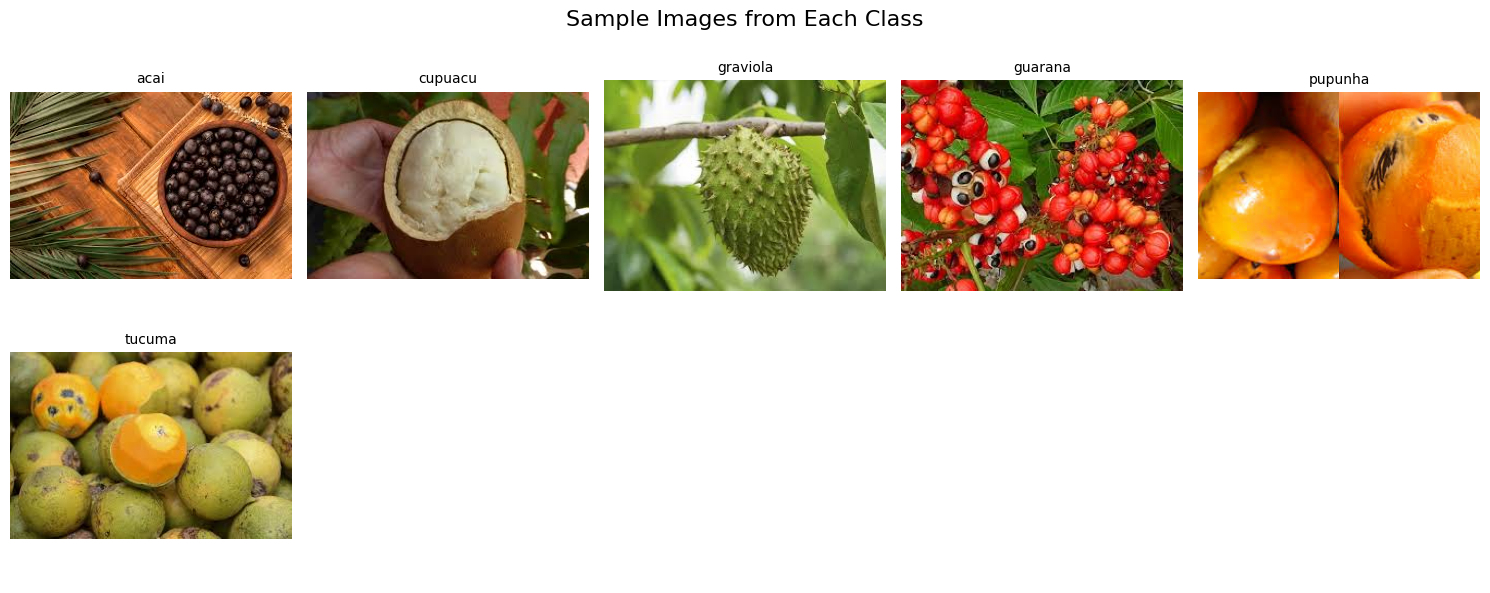

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/Workshop6/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/Workshop6/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Bipul Shakya.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.0938 - loss: 1.8056
Epoch 1: val_loss improved from inf to 1.92041, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 644ms/step - accuracy: 0.1016 - loss: 1.8047 - val_accuracy: 0.0000e+00 - val_loss: 1.9204
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.1690 - loss: 1.9751
Epoch 2: val_loss improved from 1.92041 to 1.60522, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 532ms/step - accuracy: 0.1753 - loss: 1.9525 - val_accuracy: 0.3889 - val_loss: 1.6052
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5058 - loss: 1.4139
Epoch 3: val_loss did not improve from 1.60522
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 529ms/step - accuracy: 0.5009 - loss: 1.4064 - val_accuracy: 0.0000e+00 - val_loss: 2.1381
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.3929 - loss: 1.3903
Epoch 4: val_loss improved from 1.60522 to 1.20861, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 885ms/step - accuracy: 0.4058 - loss: 1.3806 - val_accuracy: 0.4444 - val_loss: 1.2086
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.4774 - loss: 1.1361
Epoch 5: val_loss did not improve from 1.20861
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - accuracy: 0.4935 - loss: 1.1228 - val_accuracy: 0.5556 - val_loss: 1.3432
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7332 - loss: 0.8232
Epoch 6: val_loss improved from 1.20861 to 1.13034, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.7444 - loss: 0.8090 - val_accuracy: 0.5556 - val_loss: 1.1303
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.8692 - loss: 0.5284
Epoch 7: val_loss improved from 1.13034 to 0.91575, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 587ms/step - accuracy: 0.8741 - loss: 0.5263 - val_accuracy: 0.7222 - val_loss: 0.9158
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.9554 - loss: 0.3542
Epoch 8: val_loss improved from 0.91575 to 0.48364, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 0.9527 - loss: 0.3552 - val_accuracy: 0.9444 - val_loss: 0.4836
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.9902 - loss: 0.1924
Epoch 9: val_loss improved from 0.48364 to 0.42839, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 607ms/step - accuracy: 0.9891 - loss: 0.1930 - val_accuracy: 0.8889 - val_loss: 0.4284
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 1.0000 - loss: 0.1040
Epoch 10: val_loss did not improve from 0.42839
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 824ms/step - accuracy: 1.0000 - loss: 0.1022 - val_accuracy: 0.8333 - val_loss: 0.5707
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 1.0000 - loss: 0.0628
Epoch 11: val_loss did not improve from 0.42839
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 804ms/step - accuracy: 1.0000 - loss: 0.0604 - val_accuracy: 0.8889 - val_loss: 0.4501
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 1.0000 - loss: 0.0336
Epoch 12: val_loss did not improve from 0.42839
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 935ms/step - accuracy: 1.0000 - loss: 0.0329 - val_accuracy: 0.8889 - val_loss: 0.4615
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 1.0000 - loss: 0.0121
Epoch 13: val_loss did not improve from 0.42839
3/3 

In [8]:
test_dir = '/content/drive/MyDrive/Workshop6/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8333 - loss: 28.6255
Test Loss: 28.62554931640625
Test Accuracy: 0.8333333134651184


In [9]:

model.save('bipul_shakya_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.62      1.00      0.77         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      0.80      0.89         5
           5       0.67      0.40      0.50         5

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 1.0000 - loss: 0.0923
Epoch 1: val_loss did not improve from 0.42839
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 793ms/step - accuracy: 1.0000 - loss: 0.0933 - val_accuracy: 0.8889 - val_loss: 0.4396
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 1.0000 - loss: 0.1070
Epoch 2: val_loss did not improve from 0.42839
3/3 ━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9253 - loss: 0.1657 - val_accuracy: 0.8889 - val_loss: 0.3850
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 1.0000 - loss: 0.0406
Epoch 4: val_loss did not improve from 0.38503
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step - accuracy: 1.0000 - loss: 0.0399 - val_accuracy: 0.8889 - val_loss: 0.4275
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 1.0000 - loss: 0.0241
Epoch 5: val_loss improved from 0.38503 to 0.37110, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 1.0000 - loss: 0.0241 - val_accuracy: 0.8889 - val_loss: 0.3711
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 1.0000 - loss: 0.0142
Epoch 6: val_loss improved from 0.37110 to 0.34618, saving model to Bipul Shakya.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 873ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.8889 - val_loss: 0.3462
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 1.0000 - loss: 0.0076
Epoch 7: val_loss did not improve from 0.34618
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 504ms/step - accuracy: 1.0000 - loss: 0.0077 - val_accuracy: 0.8889 - val_loss: 0.3525
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 1.0000 - loss: 0.0061
Epoch 8: val_loss did not improve from 0.34618
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.8889 - val_loss: 0.3557
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 9: val_loss did not improve from 0.34618
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8889 - val_loss: 0.3598
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 1.0000 - loss: 0.0025
Epoch 10: val_loss did not improve from 0.34618
3/3 ━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 888ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8889 - val_loss: 0.3417
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 12: val_loss did not improve from 0.34173
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.8889 - val_loss: 0.3469
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 8.6727e-04
Epoch 13: val_loss did not improve from 0.34173
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 473ms/step - accuracy: 1.0000 - loss: 8.6771e-04 - val_accuracy: 0.8889 - val_loss: 0.3629
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 1.0000 - loss: 7.4421e-04
Epoch 14: val_loss did not improve from 0.34173
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 568ms/step - accuracy: 1.0000 - loss: 7.3706e-04 - val_accuracy: 0.8889 - val_loss: 0.3726
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 1.0000 - loss: 5.7643e-04
Epoch 15: val_loss did not impro

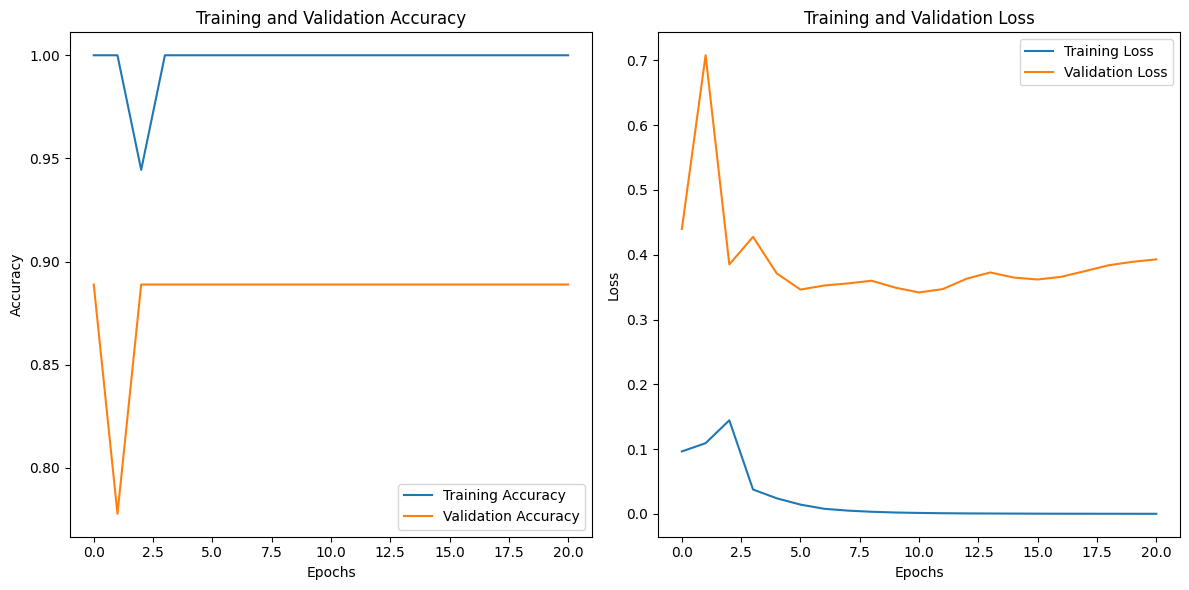

Model saved as 'shreejal_khatri_model.h5'


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('bipul_shakya__model.h5')
print("Model saved as 'shreejal_khatri_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Workshop6/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Workshop6/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Workshop6/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Workshop6/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 829ms/step - accuracy: 0.1722 - loss: 3.0042 - val_accuracy: 0.3333 - val_loss: 1.7014
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 962ms/step - accuracy: 0.4905 - loss: 1.5376 - val_accuracy: 0.3444 - val_loss: 1.6297
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 826ms/step - accuracy: 0.5874 - loss: 1.1959 - val_accuracy: 0.3000 - val_loss: 1.6180
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.6291 - loss: 1.0829 - val_accuracy: 0.1889 - val_loss: 1.6750
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 586ms/step - accuracy: 0.6006 - loss: 1.1346 - val_accuracy: 0.1667 - val_loss: 1.7778
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 563ms/step - accuracy: 0.6259 - loss: 0.9915 - val_accuracy: 0.1667 - val_loss: 1.8664
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 598ms/step - accuracy: 0.7526 - loss: 0.8751 - val_accuracy: 0.1667 - val_loss: 1.9394
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6521 - loss: 1.0383 - val_accuracy: 0.1667 - val_loss: 2.

## Task 2: Transfer Learning using VGG16

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Workshop6/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Workshop6/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 145s 63s/step - accuracy: 0.1353 - loss: 1.8989 - val_accuracy: 0.4222 - val_loss: 1.6333
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 199s 60s/step - accuracy: 0.4149 - loss: 1.5861 - val_accuracy: 0.6222 - val_loss: 1.3844
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 115s 49s/step - accuracy: 0.6171 - loss: 1.4142 - val_accuracy: 0.5444 - val_loss: 1.2839
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 60s/step - accuracy: 0.5930 - loss: 1.2759 - val_accuracy: 0.7556 - val_loss: 1.0878
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 138s 59s/step - accuracy: 0.7322 - loss: 1.1238 - val_accuracy: 0.7667 - val_loss: 0.9818


In [14]:
#Report
import numpy as np
from sklearn.metrics import classification_report


Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 58s 18s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.06      0.07      0.06        15
     cupuacu       0.20      0.27      0.23        15
    graviola       0.10      0.13      0.11        15
     guarana       0.20      0.13      0.16        15
     pupunha       0.11      0.07      0.08        15
      tucuma       0.33      0.27      0.30        15

    accuracy                           0.16        90
   macro avg       0.17      0.16      0.16        90
weighted avg       0.17      0.16      0.16        90

